In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
!unzip /content/gdrive/MyDrive/Faks/ARP1/yawn_dataset.zip -d /content

Archive:  /content/gdrive/MyDrive/Faks/ARP1/yawn_dataset.zip
   creating: /content/yawn_dataset/
   creating: /content/yawn_dataset/train/
   creating: /content/yawn_dataset/train/no_yawn/
  inflating: /content/yawn_dataset/train/no_yawn/98.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/793.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/2588.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/1936.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/1914.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/1871.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/1766.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/1949.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/2151.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/502.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/28.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/528.jpg  
  inflating: /content/yawn_dataset/train/no_yawn/1559.jpg  
  inflating: /content/yawn_dataset/tra

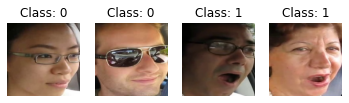

In [13]:
import os
import random
f1 = os.listdir("/content/yawn_dataset/test/no_yawn/")
f1 = random.sample(f1, 2)
f2 = os.listdir("/content/yawn_dataset/test/yawn/")
f2 = random.sample(f2, 2)
import matplotlib.pyplot as plt
import cv2
for i in range(2):
    plt.subplot(1,4,i+1)
    im = cv2.imread(os.path.join("/content/yawn_dataset/test/no_yawn/", f1[i]))
    im = cv2.resize(im, (640,640))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.axis("off");
    plt.imshow(im)
    plt.title("Class: 0")

for i in range(2):
    plt.subplot(1,4,i+2+1)
    im = cv2.imread(os.path.join("/content/yawn_dataset/test/yawn/", f2[i]))
    im = cv2.resize(im, (640,640))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.axis("off");
    plt.imshow(im)
    plt.title("Class: 1")

plt.show()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 512

train_dir = os.path.join("./yawn_dataset/train")
test_dir = os.path.join("./yawn_dataset/test")

train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    brightness_range=[0.8, 1.2],
    zoom_range=[0.8, 1.2],
    channel_shift_range=50,
    horizontal_flip=True,
    validation_split=0.2
)

test = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_dataset = train.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    shuffle=True,
    class_mode = 'binary',
    subset="training"
)

val_dataset = test.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'binary',
    subset="validation"
)

test_dataset = test.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'binary'
)


Found 987 images belonging to 2 classes.
Found 246 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


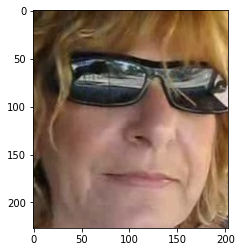

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow((image_iterator.next()[0]*255).astype('int'))
        row.axis('off')
    show()
    
image = imread("/content/yawn_dataset/test/no_yawn/1004.jpg")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

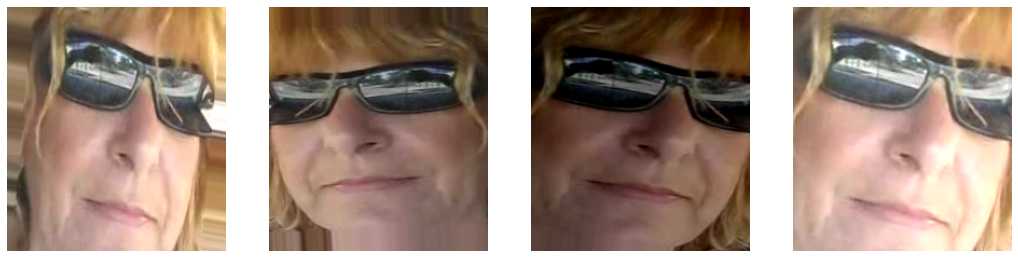

In [ ]:
plot(train)

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
    include_top=False, 
    weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer="adam",
    loss='binary_crossentropy',
    metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 16, 16, 1280)     2257984   
 ional)                                                          
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        368672    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 7, 7, 32)          0         
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 64)        

In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
    save_weights_only=True, period=5)

history = model.fit(
    train_dataset, 
    epochs=50,
    validation_data=val_dataset,
    callbacks=[mc],
)

Epoch 1/50
31/31 [==============================] - 81s 2s/step - loss: 0.6302 - accuracy: 0.6981 - val_loss: 0.3114 - val_accuracy: 0.9187
Epoch 2/50
31/31 [==============================] - 62s 2s/step - loss: 0.1989 - accuracy: 0.9311 - val_loss: 0.1705 - val_accuracy: 0.9350
Epoch 3/50
31/31 [==============================] - 63s 2s/step - loss: 0.1101 - accuracy: 0.9635 - val_loss: 0.1548 - val_accuracy: 0.9390
Epoch 4/50
31/31 [==============================] - 64s 2s/step - loss: 0.0725 - accuracy: 0.9787 - val_loss: 0.1349 - val_accuracy: 0.9512
Epoch 5/50
31/31 [==============================] - 66s 2s/step - loss: 0.0802 - accuracy: 0.9787 - val_loss: 0.1148 - val_accuracy: 0.9715
Epoch 6/50
31/31 [==============================] - 63s 2s/step - loss: 0.0771 - accuracy: 0.9716 - val_loss: 0.1110 - val_accuracy: 0.9675
Epoch 7/50
31/31 [==============================] - 64s 2s/step - loss: 0.0406 - accuracy: 0.9858 - val_loss: 0.1480 - val_accuracy: 0.9431
Epoch 8/50
31/31 [==

In [ ]:
model.load_weights("weights00000050.h5")

In [ ]:
from tqdm.notebook import tqdm

y_true = []
y_pred = []

test12 = iter(test_dataset)

for i in tqdm(range(len(test_dataset))):
    inputs, labels = test_dataset[i]
    outputs = model.predict(inputs, verbose=0).squeeze()
    outputs = (outputs > 0.5).astype(int)
    y_true.extend(labels)
    y_pred.extend(outputs)

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
print(len(y_true), len(y_pred))
print(y_true[:10])
print(y_pred[:10])

215 215
[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion matrix")
print(conf_mat)
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='binary')
print("Precision", precision)
print("Recall", recall)
print("F1", f1)

Confusion matrix
[[109   0]
 [  2 104]]
Precision 1.0
Recall 0.9811320754716981
F1 0.9904761904761905


In [ ]:
!mkdir saved_models

saved_model_dir = 'saved_models' # Put the name of the directory where you want to save the model
tf.saved_model.save(model, saved_model_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
with open('yawn.tflite', 'wb') as f:
  f.write(tflite_model)

## Metadata export

In [ ]:
from tflite_support import metadata_schema_py_generated as _metadata_fb
from tflite_support import metadata as _metadata
import flatbuffers

class ModelSpecificInfo(object):
  """Holds information that is specificly tied to an image classifier."""

  def __init__(self, name, version, image_width, image_height, image_min,
               image_max, mean, std, num_classes, author):
    self.name = name
    self.version = version
    self.image_width = image_width
    self.image_height = image_height
    self.image_min = image_min
    self.image_max = image_max
    self.mean = mean
    self.std = std
    self.num_classes = num_classes
    self.author = author

_MODEL_INFO = {
    "yawn.tflite":
        ModelSpecificInfo(
            name="MobileNetV2",
            version="v1",
            image_width=IMAGE_SIZE,
            image_height=IMAGE_SIZE,
            image_min=0,
            image_max=255,
            mean=[127.5],
            std=[127.5],
            num_classes=1,
            author="TensorFlow")
}

class MetadataPopulatorForImageClassifier(object):
  """Populates the metadata for an image classifier."""

  def __init__(self, model_file, model_info, label_file_path):
    self.model_file = model_file
    self.model_info = model_info
    self.label_file_path = label_file_path
    self.metadata_buf = None

  def populate(self):
    """Creates metadata and then populates it for an image classifier."""
    self._create_metadata()
    self._populate_metadata()

  def _create_metadata(self):
    """Creates the metadata for an image classifier."""

    # Creates model info.
    model_meta = _metadata_fb.ModelMetadataT()
    model_meta.name = self.model_info.name
    model_meta.description = ("Identify the most prominent object in the "
                              "image from a set of %d categories." %
                              self.model_info.num_classes)
    model_meta.version = self.model_info.version
    model_meta.author = self.model_info.author
    model_meta.license = ("Apache License. Version 2.0 "
                          "http://www.apache.org/licenses/LICENSE-2.0.")

    # Creates input info.
    input_meta = _metadata_fb.TensorMetadataT()
    input_meta.name = "image"
    input_meta.description = (
        "Input image to be classified. The expected image is {0} x {1}, with "
        "three channels (red, blue, and green) per pixel. Each value in the "
        "tensor is a single byte between {2} and {3}.".format(
            self.model_info.image_width, self.model_info.image_height,
            self.model_info.image_min, self.model_info.image_max))
    input_meta.content = _metadata_fb.ContentT()
    input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
    input_meta.content.contentProperties.colorSpace = (
        _metadata_fb.ColorSpaceType.RGB)
    input_meta.content.contentPropertiesType = (
        _metadata_fb.ContentProperties.ImageProperties)
    input_normalization = _metadata_fb.ProcessUnitT()
    input_normalization.optionsType = (
        _metadata_fb.ProcessUnitOptions.NormalizationOptions)
    input_normalization.options = _metadata_fb.NormalizationOptionsT()
    input_normalization.options.mean = self.model_info.mean
    input_normalization.options.std = self.model_info.std
    input_meta.processUnits = [input_normalization]
    input_stats = _metadata_fb.StatsT()
    input_stats.max = [self.model_info.image_max]
    input_stats.min = [self.model_info.image_min]
    input_meta.stats = input_stats

    # Creates output info.
    output_meta = _metadata_fb.TensorMetadataT()
    output_meta.name = "probability"
    output_meta.description = "Probabilities of the %d labels respectively." % self.model_info.num_classes
    output_meta.content = _metadata_fb.ContentT()
    output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
    output_meta.content.contentPropertiesType = (
        _metadata_fb.ContentProperties.FeatureProperties)
    output_stats = _metadata_fb.StatsT()
    output_stats.max = [1.0]
    output_stats.min = [0.0]
    output_meta.stats = output_stats
    label_file = _metadata_fb.AssociatedFileT()
    label_file.name = os.path.basename(self.label_file_path)
    label_file.description = "Labels for objects that the model can recognize."
    label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
    output_meta.associatedFiles = [label_file]

    # Creates subgraph info.
    subgraph = _metadata_fb.SubGraphMetadataT()
    subgraph.inputTensorMetadata = [input_meta]
    subgraph.outputTensorMetadata = [output_meta]
    model_meta.subgraphMetadata = [subgraph]

    b = flatbuffers.Builder(0)
    b.Finish(
        model_meta.Pack(b),
        _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
    self.metadata_buf = b.Output()

  def _populate_metadata(self):
    """Populates metadata and label file to the model file."""
    populator = _metadata.MetadataPopulator.with_model_file(self.model_file)
    populator.load_metadata_buffer(self.metadata_buf)
    populator.load_associated_files([self.label_file_path])
    populator.populate()

In [ ]:
model_file = "euronet.tflite"
model_basename = os.path.basename(model_file)

export_model_path = os.path.join(saved_model_dir, model_basename)

# Copies model_file to export_path.
tf.io.gfile.copy(model_file, export_model_path, overwrite=True)

# Generate the metadata objects and put them in the model file
populator = MetadataPopulatorForImageClassifier(
  export_model_path, _MODEL_INFO.get(model_file), "labels.txt")
populator.populate()

In [ ]:
# Validate the output model file by reading the metadata and produce
# a json file with the metadata under the export path
displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
export_json_file = os.path.join(saved_model_dir, os.path.splitext(model_basename)[0] + ".json")
json_file = displayer.get_metadata_json()
with open(export_json_file, "w") as f:
    f.write(json_file)

In [ ]:
print("Finished populating metadata and associated file to the model:")
print(model_file)
print("The metadata json file has been saved to:")
print(export_json_file)
print("The associated file that has been been packed to the model is:")
print(displayer.get_packed_associated_file_list())